In [1]:
# Use ‘kc_house_data.csv’ data set. Drop irrelevant features by
# comparing correlation of price with other features. Split the
# dataset in Training and Testing Part. Apply Simple Linear
# regression and multiple linear regression for house price
# prediction. Comment on accuracy of the predictions on test
# data set.

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('/content/kc_house_data.csv')
df.dropna(inplace= True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


<ipython-input-3-24e5a3402d15>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

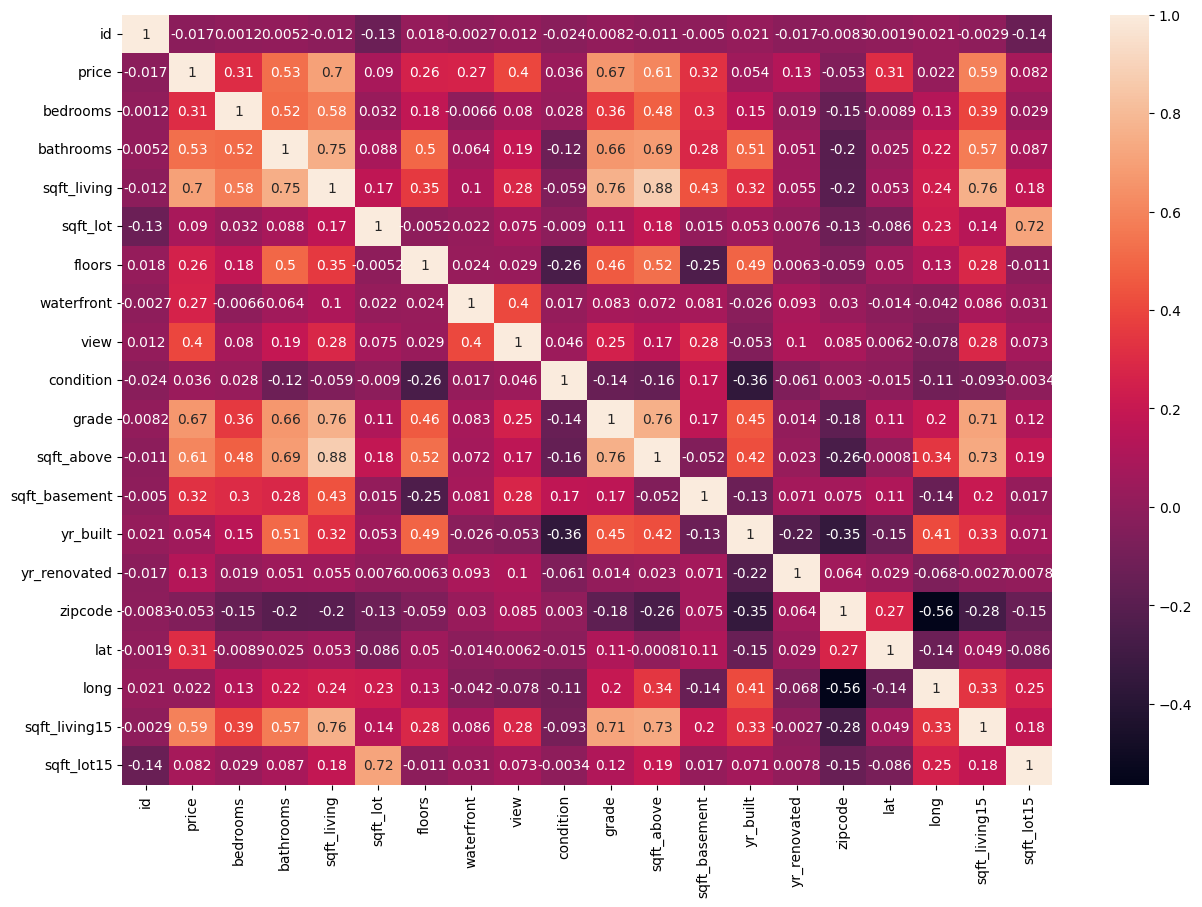

In [3]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, ax=ax)

In [4]:
correlations = df.corr()
relevant_features = correlations['price'].sort_values(ascending=False)[:5].index  # Select the top correlated features
df = df[relevant_features]
df

<ipython-input-4-b28643c2d20b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


,price,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1180,7,1180.0,1340
1,538000.0,2570,7,2170.0,1690
2,180000.0,770,6,770.0,2720
3,604000.0,1960,7,1050.0,1360
4,510000.0,1680,8,1680.0,1800
...,...,...,...,...,...
21608,360000.0,1530,8,1530.0,1530
21609,400000.0,2310,8,2310.0,1830
21610,402101.0,1020,7,1020.0,1020
21611,400000.0,1600,8,1600.0,1410


In [5]:
x = df[['sqft_living']]
y = df[['price']]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17288, 1), (4323, 1), (17288, 1), (4323, 1))

In [6]:
x

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


In [7]:
#Simple linear regression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

#predicting for x test
y_pred = lin_reg.predict(x_test)

In [8]:
print("Linear Regression:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared (R2): {r2_score(y_test, y_pred)}")

Linear Regression:
Mean Squared Error: 74448995966.77663
R-squared (R2): 0.5016846041550944


In [9]:
X = df.drop(columns=['price'])  # Features (Independent Variables)
y = df['price']  # Target (Dependent Variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X

,sqft_living,grade,sqft_above,sqft_living15
0,1180,7,1180.0,1340
1,2570,7,2170.0,1690
2,770,6,770.0,2720
3,1960,7,1050.0,1360
4,1680,8,1680.0,1800
...,...,...,...,...
21608,1530,8,1530.0,1530
21609,2310,8,2310.0,1830
21610,1020,7,1020.0,1020
21611,1600,8,1600.0,1410


In [11]:
# Create and train a multiple linear regression model
multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)

# Make predictions on the test set
multi_lr_predictions = multi_lr.predict(X_test)

# Calculate and print the multiple linear regression metrics
mse_multi = mean_squared_error(y_test, multi_lr_predictions)
r2_multi = r2_score(y_test, multi_lr_predictions)

print("\nMultiple Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse_multi}")
print(f"R-squared (R2) Score: {r2_multi}")


Multiple Linear Regression Results:
Mean Squared Error (MSE): 67839715531.15915
R-squared (R2) Score: 0.5459230274374509
